In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns", None)    

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Madrid%20real%20estate%20market/houses_Madrid.csv", sep=',', header=0, index_col=0)
data.head()

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [3]:
print("The number of rows is {} and the number of columns is {}".format(data.shape[0], data.shape[1]))
print("---------------------------------------------------------------")
print(data.info(verbose=True))

The number of rows is 21742 and the number of columns is 57
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64


In [4]:
data.duplicated().any()

False

In [5]:
data.drop(columns=['is_exact_address_hidden', 'street_name', 'street_number', 'is_rent_price_known', 'is_buy_price_known', 'rent_price'], inplace=True)
data.dropna(axis=1, how='all', inplace=True)
print("The new number of columns is {}".format(data.shape[1]))

The new number of columns is 41


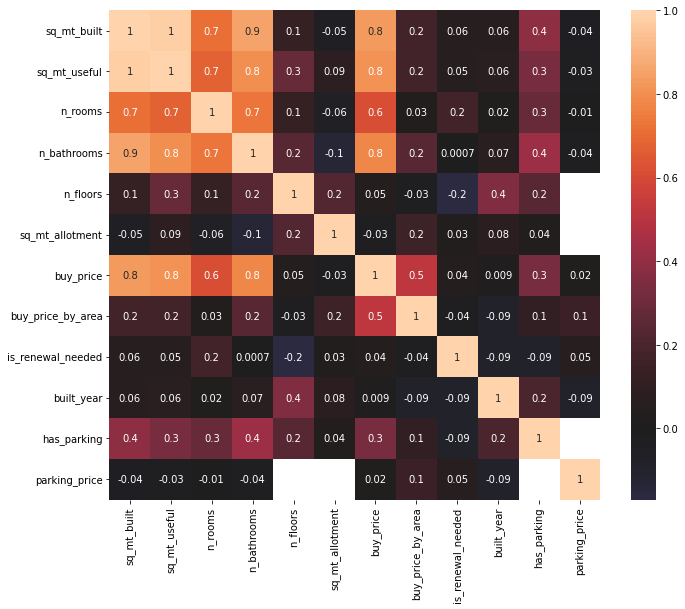

In [6]:
corr = data.iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr ,annot=True, fmt='.1g',center=0) 
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

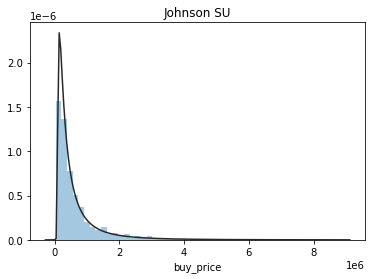

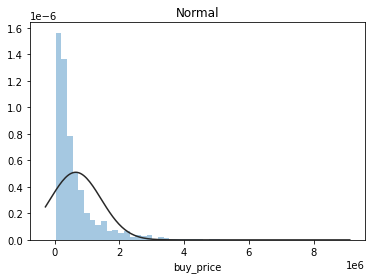

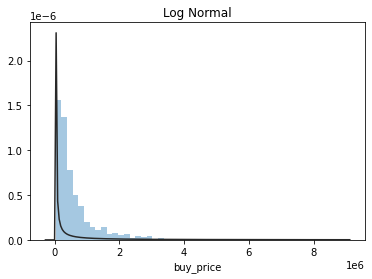

In [7]:
y = data['buy_price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
plt.show()

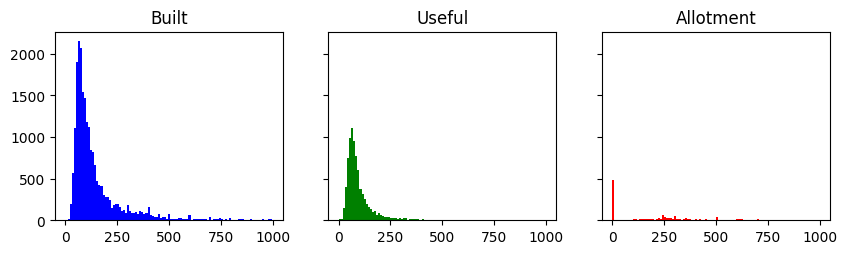

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)

ax[0].hist(data.sq_mt_built, bins=100, color='b')
ax[0].set_title('Built')
ax[1].hist(data.sq_mt_useful, bins=100, color='g')
ax[1].set_title('Useful')
ax[2].hist(data.sq_mt_allotment, bins=100, color='r')
ax[2].set_title('Allotment')
plt.show()

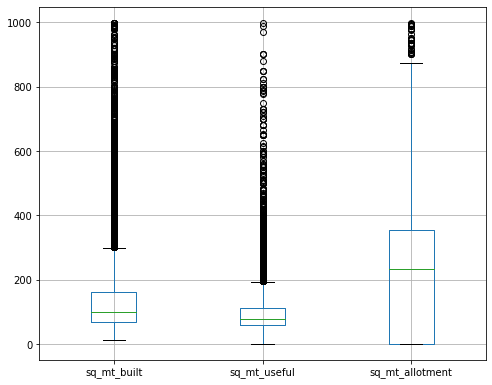

In [9]:
%matplotlib inline
f, ax = plt.subplots(figsize=(8, 6.5))

data.boxplot(column=['sq_mt_built', 'sq_mt_useful', 'sq_mt_allotment'])
plt.show()

In [10]:
data.agg({'sq_mt_useful': ['min', 'max'], 'sq_mt_built': ['min', 'max'], 'sq_mt_allotment': ['min', 'max']})

,sq_mt_useful,sq_mt_built,sq_mt_allotment
min,1.0,13.0,1.0
max,998.0,999.0,997.0


In [11]:
data[['sq_mt_useful', 'sq_mt_built', 'sq_mt_allotment']].describe()

,sq_mt_useful,sq_mt_built,sq_mt_allotment
count,8228.000000,21616.000000,1432.000000
mean,103.458192,146.920892,241.692737
std,88.259192,134.181865,247.484853
min,1.000000,13.000000,1.000000
25%,59.000000,70.000000,2.000000
50%,79.000000,100.000000,232.000000
75%,113.000000,162.000000,354.000000
max,998.000000,999.000000,997.000000


In [12]:
data.query('sq_mt_built<23.0')[['title','sq_mt_built', 'sq_mt_useful', 'n_rooms']]

,title,sq_mt_built,sq_mt_useful,n_rooms
105,Piso en venta en calle Platino,16.0,NaN,3
3248,Estudio en venta en calle Juan Pantoja,18.0,15.0,0
4942,Estudio en venta en San Diego,22.0,NaN,0
5650,Estudio en venta en calle Emilio Ortuño,13.0,11.0,0
11517,"Estudio en venta en Castillo, 6",20.0,NaN,0
11701,Piso en venta en Gaztambide,20.0,NaN,1
12329,Piso en venta en calle de Santa Engracia,22.0,19.0,1
17491,Estudio en venta en Sol,19.0,NaN,0
17617,"Estudio en venta en calle del Amparo, Madrid",15.0,NaN,0
18107,Estudio en venta en calle de San Vicente Ferre...,20.0,NaN,0


In [13]:
data.query('sq_mt_useful<15.0')[['title','sq_mt_built', 'sq_mt_useful', 'n_rooms', 'n_bathrooms']]

,title,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms
37,Piso en venta en paseo de Alberto Palacios,60.0,1.0,2,1.0
4056,Piso en venta en avenida de la Ciudad de Barce...,160.0,1.0,4,2.0
5079,Piso en venta en calle Lozano,45.0,1.0,1,1.0
5650,Estudio en venta en calle Emilio Ortuño,13.0,11.0,0,1.0
6926,Casa o chalet en venta en Valdemarín,NaN,1.0,7,9.0
7051,Casa o chalet independiente en venta en Calle...,NaN,1.0,9,9.0
7146,Casa o chalet independiente en venta en calle...,NaN,1.0,7,8.0
7160,Casa o chalet independiente en venta en Urb. ...,NaN,2.0,11,14.0
7188,Casa o chalet independiente en venta en calle...,NaN,1.0,7,6.0
7614,Casa o chalet independiente en venta en Urb. ...,NaN,1.0,5,5.0


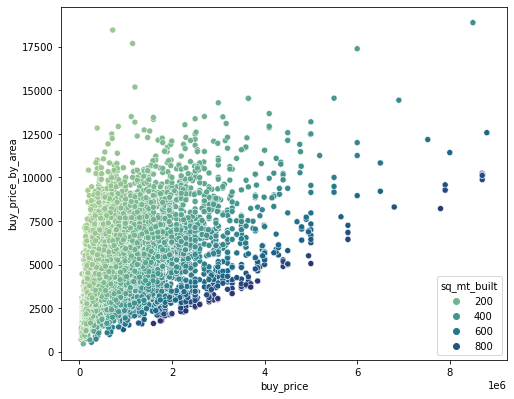

In [14]:
f, ax = plt.subplots(figsize=(8, 6.5))

sns.scatterplot(data=data, x='buy_price', y='buy_price_by_area', hue='sq_mt_built', palette='crest', ax=ax)
plt.show()

In [15]:
rel_built = data['sq_mt_built'].isnull()
data.loc[(rel_built), 'sq_mt_built'] = (data['buy_price'] / data['buy_price_by_area'])

print('The final number of missing values for sq_mt_built is: {}'.format(data.sq_mt_built.isnull().sum()))

data.drop(columns=["sq_mt_useful"], inplace=True)

The final number of missing values for sq_mt_built is: 0


In [16]:
data.house_type_id = data.house_type_id.astype('str')
allotment_notnull = ((data.sq_mt_allotment.notnull())& (data.house_type_id.str.contains('Casa'))).sum()
print("The number of houses with no empty values in 'sq_mt_allotment' is {} from a total of 1432 no null values".format(allotment_notnull))

The number of houses with no empty values in 'sq_mt_allotment' is 1429 from a total of 1432 no null values


In [17]:
data[(data.sq_mt_allotment.notnull())& (~data.house_type_id.str.contains('Casa'))][['title', 'sq_mt_built', 'sq_mt_allotment', 'n_floors', 'house_type_id']]

,title,sq_mt_built,sq_mt_allotment,n_floors,house_type_id
7578,Casa de pueblo en venta en calle Agustín Lara,132.0,275.0,NaN,nan
8400,Finca rústica en venta en TIRO A PICHON,450.0,72.0,2.0,nan
8423,Finca rústica en venta en El Pardo,450.0,71.0,2.0,nan


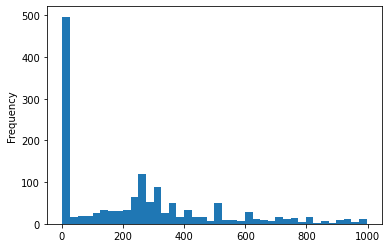

In [18]:
data['sq_mt_allotment'].plot.hist(bins=40)
plt.show()

In [19]:
print("Number of houses with less than 6 m²: {}".format(data.query('sq_mt_allotment<6').shape[0]))
print("Number of houses between 4 y 10 m²: {}".format(data.query('4<sq_mt_allotment<10').shape[0]))
print("Number of houses between 9 y 15 m²: {}".format(data.query('9<sq_mt_allotment<15').shape[0]))
print("Number of houses between 15 y 20 m²: {}".format(data.query('15<sq_mt_allotment<20.0').shape[0]))
print("Number of houses between 19 y 25 m²: {}".format(data.query('19<sq_mt_allotment<25').shape[0]))
print("Number of houses between 29 y 35 m²: {}".format(data.query('29<sq_mt_allotment<35').shape[0]))

Number of houses with less than 6 m²: 472
Number of houses between 4 y 10 m²: 14
Number of houses between 9 y 15 m²: 6
Number of houses between 15 y 20 m²: 0
Number of houses between 19 y 25 m²: 8
Number of houses between 29 y 35 m²: 2


In [20]:
data.query('sq_mt_allotment<6')[['title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'buy_price']].head()

,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,buy_price
5709,Casa o chalet en venta en calle Camarines,"Aravaca, Madrid",584.0,7,4.0,2.0,3.0,1990000
5727,Casa o chalet independiente en venta en calle...,"Aravaca, Madrid",800.0,6,8.0,4.0,1.0,1680000
5728,Casa o chalet independiente en venta en Ciuda...,"Moncloa, Madrid",280.0,5,3.0,2.0,2.0,1590000
5739,Casa o chalet independiente en venta en Ciuda...,"Moncloa, Madrid",611.0,6,8.0,NaN,1.0,2950000
5741,Casa o chalet independiente en venta en El Pl...,"Moncloa, Madrid",396.0,5,4.0,3.0,2.0,1350000


In [21]:
rel_allotment1 = (data['sq_mt_allotment'] <10)
data.loc[(rel_allotment1), 'sq_mt_allotment'] = (data['sq_mt_allotment'] * 1000)
rel_allotment2 = (data['sq_mt_allotment'] <30) & (data['buy_price'] > 1000000)
data.loc[(rel_allotment2), 'sq_mt_allotment'] = (data['sq_mt_allotment'] * 1000)
print(data.sq_mt_allotment.describe())
data.query('sq_mt_allotment<30')[['title', 'subtitle', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'buy_price']].head()

count     1432.000000
mean       877.927374
std       1297.088924
min         10.000000
25%        261.750000
50%        500.000000
75%       1000.000000
max      21000.000000
Name: sq_mt_allotment, dtype: float64


,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,buy_price
402,Casa o chalet independiente en venta en alto ...,"San Andrés, Madrid",242.0,4,3.0,4.0,22.0,380000
1162,Chalet adosado en venta en calle Mayorazgo de...,"El Cañaveral - Los Berrocales, Madrid",155.0,4,2.0,3.0,29.0,349500
1949,Chalet adosado en venta en calle ichaso,"Orcasitas, Madrid",81.0,3,2.0,2.0,20.0,240000
2224,"Chalet adosado en venta en calle Barranca, 25","San Fermín, Madrid",120.0,3,1.0,1.0,10.0,270000
2272,"Chalet adosado en venta en Urb. cartagena, 12...","Usera, Madrid",114.0,3,2.0,2.0,25.0,189000


In [22]:
data['sq_mt_allotment'] = data['sq_mt_allotment'].fillna(0)
print("Number of missing values in 'sq_mt_allotment': {}".format(data.sq_mt_allotment.isnull().sum()))

Number of missing values in 'sq_mt_allotment': 0


In [23]:
data.house_type_id.value_counts() 

HouseType 1: Pisos            17705
HouseType 2: Casa o chalet     1938
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
nan                             391
Name: house_type_id, dtype: int64

In [24]:
print(data[(data.title.str.contains('Estudio')) & (data.house_type_id.str.contains('nan'))].shape[0])
rel_housetype = ((data.title.str.contains('Estudio')) & (data.house_type_id.str.contains('nan')))

388


In [25]:
data.loc[(rel_housetype), 'house_type_id'] = "HouseType 3: Estudio"

data.drop(index=[7578, 8400, 8423], inplace=True)

In [26]:
data[(data.house_type_id.str.contains('Estudio') & (data.n_rooms == 0))].shape[0]

385

In [27]:
rel_estudios = (data.house_type_id.str.contains('Estudio') & (data.n_rooms > 0))
data[rel_estudios]

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,floor,is_floor_under,neighborhood_id,operation,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
6197,15545,"Estudio en venta en calle Navas del Rey, 30","Puerta del Ángel, Madrid",45.0,1,1.0,NaN,0.0,"Calle Navas del Rey, 30",Bajo,True,Neighborhood 70: Puerta del Ángel (2443.62 €/m...,sale,155000,3444,HouseType 3: Estudio,False,False,NaN,False,True,True,True,False,False,NaN,NaN,NaN,NaN,True,NaN,NaN,no indicado,False,NaN,NaN,False,True,False,True
11964,9778,"Estudio en venta en calle de Gaztambide, 36","Gaztambide, Madrid",75.0,1,2.0,NaN,0.0,"Calle de Gaztambide, 36",Bajo,True,Neighborhood 34: Gaztambide (5000.0 €/m2) - Di...,sale,350000,4667,HouseType 3: Estudio,True,False,1984.0,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,False,True,False,False
12274,9468,"Estudio en venta en calle Santa Engracia, 51","Trafalgar, Madrid",64.0,1,1.0,NaN,0.0,"Calle Santa Engracia, 51",2,False,Neighborhood 35: Trafalgar (5640.18 €/m2) - Di...,sale,485000,7578,HouseType 3: Estudio,False,True,NaN,NaN,NaN,NaN,NaN,True,True,NaN,True,NaN,NaN,True,NaN,NaN,A,True,True,0.0,NaN,NaN,NaN,NaN


In [28]:
data.loc[(rel_estudios), 'house_type_id'] = "HouseType 1: Pisos"
print("Data on 'Estudios'", data.loc[data.house_type_id.str.contains('Estudio')][['sq_mt_built', 'buy_price']].describe(), sep="\n") 
print("Data on 'Pisos' flats", data.loc[data.house_type_id.str.contains('Piso')][['sq_mt_built', 'buy_price']].describe(), sep="\n")

Data on 'Estudios'
       sq_mt_built     buy_price
count   385.000000  3.850000e+02
mean     53.337662  2.102311e+05
std      36.322274  1.352290e+05
min      13.000000  5.299000e+04
25%      35.000000  1.360000e+05
50%      44.000000  1.850000e+05
75%      57.000000  2.465000e+05
max     300.000000  1.600000e+06
Data on 'Pisos' flats
        sq_mt_built     buy_price
count  17708.000000  1.770800e+04
mean     117.548961  5.204200e+05
std       79.827618  5.762118e+05
min       16.000000  3.600000e+04
25%       68.000000  1.810000e+05
50%       93.000000  3.300000e+05
75%      138.000000  6.103620e+05
max      894.000000  8.500000e+06


In [29]:
data[(data.house_type_id.str.contains('Estudio')) & (data.floor == 'Bajo') & (data.sq_mt_built > 100)][['title', 'subtitle', 'sq_mt_built', 
                                                                                                        'n_bathrooms', 'buy_price']].sort_values(by='sq_mt_built')

,title,subtitle,sq_mt_built,n_bathrooms,buy_price
16577,"Estudio en venta en calle Falcinelo, 35","Puerta Bonita, Madrid",104.0,1.0,151151
2229,"Estudio en venta en calle de Ramón Luján, Madrid","Almendrales, Madrid",110.0,2.0,120000
14889,"Estudio en venta en calle Zabaleta, 11","Prosperidad, Madrid",110.0,2.0,375000
11921,"Estudio en venta en calle Calvo Asensio, 4","Gaztambide, Madrid",110.0,2.0,360000
6250,"Estudio en venta en paseo Olivos, 27","Puerta del Ángel, Madrid",110.0,2.0,180000
3351,"Estudio en venta en calle Mariano Fernández, 4","Berruguete, Madrid",112.0,1.0,259470
3805,Estudio en venta en Valdeacederas,"Tetuán, Madrid",115.0,1.0,395000
4345,Estudio en venta en paseo de la Infanta Isabel...,"Jerónimos, Madrid",119.0,2.0,750000
11823,"Estudio en venta en calle Feijóo, 11","Trafalgar, Madrid",120.0,1.0,350000
3705,"Estudio en venta en Urb. Almenara, Ventilla-Al...","Tetuán, Madrid",120.0,1.0,240000


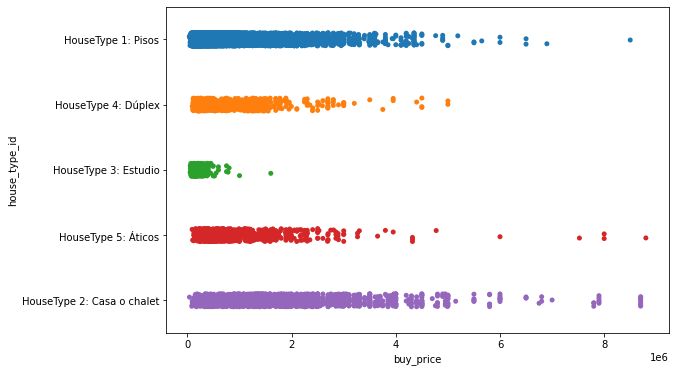

In [30]:
f, ax = plt.subplots(figsize=(9, 6))

sns.stripplot(y='house_type_id', x='buy_price', data=data, ax=ax)
plt.show()

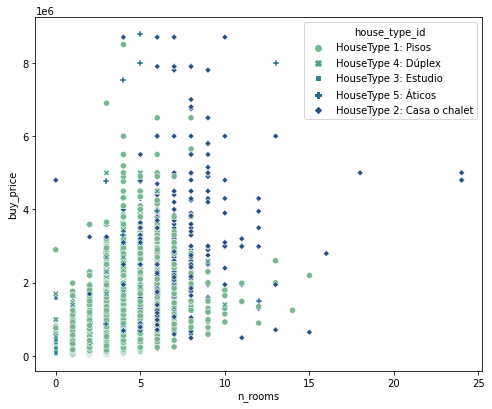

In [31]:
f, ax = plt.subplots(figsize=(8, 6.5))

sns.scatterplot(data=data, x='n_rooms', y='buy_price', hue='house_type_id', style='house_type_id', palette='crest', ax=ax)
plt.show()

In [32]:
data.n_rooms.value_counts()

3     7213
2     5499
4     3367
1     2267
5     1755
6      715
0      439
7      259
8      112
9       54
10      26
11      10
12       9
13       6
24       3
15       2
16       1
18       1
14       1
Name: n_rooms, dtype: int64

In [33]:
rel_noestudios = (data.n_rooms == 0) & (~data.house_type_id.str.contains('Estudio'))
data.loc[(rel_noestudios)]['house_type_id'].value_counts()

HouseType 4: Dúplex           21
HouseType 1: Pisos            19
HouseType 5: Áticos           12
HouseType 2: Casa o chalet     2
Name: house_type_id, dtype: int64

In [34]:
rel_casa_norooms = data.loc[(rel_noestudios) & (data.house_type_id == "HouseType 2: Casa o chalet")]
rel_casa_norooms

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,floor,is_floor_under,neighborhood_id,operation,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
9347,12395,Casa o chalet independiente en venta en Peñag...,"Fuencarral, Madrid",309.0,0,NaN,NaN,0.0,NaN,NaN,NaN,Neighborhood 53: Peñagrande (3271.96 €/m2) - D...,sale,370000,1197,HouseType 2: Casa o chalet,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inmueble exento,False,NaN,NaN,False,False,True,True
14045,7697,Chalet pareado en venta en El Viso,"Chamartín, Madrid",750.0,0,NaN,NaN,0.0,NaN,NaN,NaN,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,sale,4800000,6400,HouseType 2: Casa o chalet,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True,NaN,NaN,en trámite,True,True,0.0,NaN,NaN,NaN,NaN


In [35]:
data[(data.subtitle.str.contains('Fuencarral')) & (data.title.str.contains('Casa', 'independiente')) & (250 < data.sq_mt_built) & 
     (data.sq_mt_built < 350)]

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,floor,is_floor_under,neighborhood_id,operation,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
8308,13434,Casa o chalet independiente en venta en Miras...,"Fuencarral, Madrid",319.0,5,3.0,2.0,1000.0,NaN,NaN,False,Neighborhood 56: Mirasierra (3695.5 €/m2) - Di...,sale,1650000,5172,HouseType 2: Casa o chalet,False,False,1968.0,False,True,NaN,True,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,False,False,True,False
8954,12788,Casa o chalet independiente en venta en Miras...,"Fuencarral, Madrid",320.0,4,3.0,NaN,0.0,NaN,NaN,NaN,Neighborhood 56: Mirasierra (3695.5 €/m2) - Di...,sale,1650000,5156,HouseType 2: Casa o chalet,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
9251,12491,Casa o chalet independiente en venta en Miras...,"Fuencarral, Madrid",276.0,5,3.0,2.0,1000.0,NaN,NaN,False,Neighborhood 56: Mirasierra (3695.5 €/m2) - Di...,sale,1550000,5616,HouseType 2: Casa o chalet,False,False,NaN,False,True,True,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
9347,12395,Casa o chalet independiente en venta en Peñag...,"Fuencarral, Madrid",309.0,0,NaN,NaN,0.0,NaN,NaN,NaN,Neighborhood 53: Peñagrande (3271.96 €/m2) - D...,sale,370000,1197,HouseType 2: Casa o chalet,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inmueble exento,False,NaN,NaN,False,False,True,True
9357,12385,Casa o chalet en venta en Tres Olivos - Valverde,"Fuencarral, Madrid",317.0,3,2.0,NaN,0.0,NaN,NaN,NaN,Neighborhood 55: Tres Olivos - Valverde (2648....,sale,649000,2047,HouseType 2: Casa o chalet,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,no indicado,True,True,0.0,NaN,NaN,NaN,NaN


In [36]:
data.loc[9347,'n_rooms'] = 4
data.loc[9347,'n_bathrooms'] = 3

In [37]:
data[(data.title.str.contains('pareado')) & (700 < data.sq_mt_built) & (data.sq_mt_built < 800)]

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,floor,is_floor_under,neighborhood_id,operation,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
7023,14719,Chalet pareado en venta en Ciudad Universitaria,"Moncloa, Madrid",751.0,7,8.0,3.0,1000.0,NaN,NaN,False,Neighborhood 75: Ciudad Universitaria (3810.08...,sale,2800000,3728,HouseType 2: Casa o chalet,False,False,1970.0,False,True,NaN,True,NaN,NaN,True,True,NaN,NaN,True,NaN,NaN,en trámite,True,True,0.0,False,False,True,True
7098,14644,Chalet pareado en venta en Ciudad Universitaria,"Moncloa, Madrid",751.0,7,8.0,3.0,1000.0,NaN,NaN,False,Neighborhood 75: Ciudad Universitaria (3810.08...,sale,2800000,3728,HouseType 2: Casa o chalet,False,False,1970.0,False,True,True,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,D,True,True,0.0,NaN,NaN,NaN,NaN
9525,12217,Chalet pareado en venta en avenida de los mad...,"Conde Orgaz-Piovera, Madrid",750.0,6,5.0,4.0,709.0,"Avenida de los madroños, 71",NaN,False,Neighborhood 59: Conde Orgaz-Piovera (4275.46 ...,sale,3100000,4133,HouseType 2: Casa o chalet,False,False,NaN,NaN,NaN,True,True,NaN,NaN,True,True,True,NaN,True,NaN,NaN,F,True,True,0.0,False,False,True,True
9817,11925,Chalet pareado en venta en Conde Orgaz-Piovera,"Hortaleza, Madrid",750.0,4,5.0,4.0,900.0,NaN,NaN,False,Neighborhood 59: Conde Orgaz-Piovera (4275.46 ...,sale,3100000,4133,HouseType 2: Casa o chalet,False,False,1989.0,False,True,True,True,NaN,NaN,True,True,NaN,True,True,NaN,NaN,D,True,True,0.0,False,False,True,False
10311,11431,Chalet pareado en venta en Conde Orgaz-Piovera,"Hortaleza, Madrid",740.0,6,7.0,4.0,650.0,NaN,NaN,False,Neighborhood 59: Conde Orgaz-Piovera (4275.46 ...,sale,3200000,4324,HouseType 2: Casa o chalet,False,False,NaN,False,True,True,True,NaN,NaN,True,True,True,True,True,NaN,NaN,en trámite,True,True,0.0,False,False,True,False
14045,7697,Chalet pareado en venta en El Viso,"Chamartín, Madrid",750.0,0,NaN,NaN,0.0,NaN,NaN,NaN,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,sale,4800000,6400,HouseType 2: Casa o chalet,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,NaN,True,NaN,NaN,en trámite,True,True,0.0,NaN,NaN,NaN,NaN


In [38]:
data.loc[14045, 'n_rooms'] = 6
data.loc[14045, 'n_bathrooms'] = 7
data.loc[14045, 'n_floors'] = 4
rel_atico_norooms = data.loc[(rel_noestudios) & (data.house_type_id == "HouseType 5: Áticos")]
rel_atico_norooms

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,floor,is_floor_under,neighborhood_id,operation,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
1409,20333,Ático en venta en avenida Ensanche de Vallecas...,"Ensanche de Vallecas - La Gavia, Madrid",52.0,0,1.0,NaN,0.0,"Avenida Ensanche de Vallecas, 83",8,False,Neighborhood 129: Ensanche de Vallecas - La Ga...,sale,158000,3038,HouseType 5: Áticos,False,False,NaN,False,True,True,NaN,True,True,NaN,True,True,True,NaN,True,NaN,A,True,True,0.0,False,False,True,False
6007,15735,Ático en venta en paseo de los Jesuitas,"Puerta del Ángel, Madrid",35.0,0,1.0,NaN,0.0,Paseo de los Jesuitas,3,False,Neighborhood 70: Puerta del Ángel (2443.62 €/m...,sale,134000,3829,HouseType 5: Áticos,False,False,2007.0,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,True,NaN,NaN,G,False,NaN,NaN,NaN,NaN,NaN,NaN
6369,15373,"Ático en venta en Urb. pueta del angel, Puerta...","Latina, Madrid",39.0,0,1.0,NaN,0.0,Urb. pueta del angel,3,False,Neighborhood 70: Puerta del Ángel (2443.62 €/m...,sale,134000,3436,HouseType 5: Áticos,False,False,2007.0,False,True,True,True,True,True,NaN,NaN,True,NaN,True,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
6619,15123,"Ático en venta en calle francisca armada, 25","Los Cármenes, Madrid",48.0,0,1.0,NaN,0.0,"Calle francisca armada, 25",3,False,Neighborhood 71: Los Cármenes (2458.61 €/m2) -...,sale,235000,4896,HouseType 5: Áticos,False,True,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,A,False,NaN,NaN,NaN,NaN,NaN,NaN
7427,14315,Ático en venta en Argüelles,"Moncloa, Madrid",40.0,0,1.0,NaN,0.0,NaN,5,False,Neighborhood 73: Argüelles (4807.69 €/m2) - Di...,sale,322000,8050,HouseType 5: Áticos,False,False,NaN,False,True,True,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,G,False,NaN,NaN,NaN,NaN,NaN,NaN
8858,12884,"Ático en venta en Urb. fuentelarreina, Fuentel...","Fuencarral, Madrid",60.0,0,1.0,NaN,0.0,Urb. fuentelarreina,5,False,Neighborhood 49: Fuentelarreina (3371.55 €/m2)...,sale,285000,4750,HouseType 5: Áticos,True,False,1965.0,True,False,True,NaN,True,True,NaN,True,True,NaN,True,NaN,True,en trámite,False,NaN,NaN,False,False,True,False
9957,11785,"Ático en venta en Alejandro Villegas, 3","Canillas, Madrid",64.0,0,1.0,NaN,0.0,"Alejandro Villegas, 3",3,False,Neighborhood 58: Canillas (3152.53 €/m2) - Dis...,sale,271078,4236,HouseType 5: Áticos,False,False,NaN,False,True,True,NaN,True,True,NaN,NaN,True,NaN,True,True,NaN,en trámite,True,False,18000.0,NaN,NaN,NaN,NaN
11594,10148,Ático en venta en calle de Rodríguez San Pedro...,"Gaztambide, Madrid",101.0,0,1.0,NaN,0.0,"Calle de Rodríguez San Pedro, 49",6,False,Neighborhood 34: Gaztambide (5000.0 €/m2) - Di...,sale,790000,7822,HouseType 5: Áticos,False,False,NaN,False,True,True,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,True,True,True,False
13125,8617,Ático en venta en calle de Torrelaguna,"Colina, Madrid",50.0,0,1.0,NaN,0.0,Calle de Torrelaguna,5,False,Neighborhood 44: Colina (4677.53 €/m2) - Distr...,sale,230000,4600,HouseType 5: Áticos,False,False,NaN,NaN,NaN,True,True,True,True,NaN,True,True,NaN,NaN,NaN,True,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
13595,8147,"Ático en venta en calle Carolina Coronado, 29","Pueblo Nuevo, Madrid",55.0,0,1.0,NaN,0.0,"Calle Carolina Coronado, 29",NaN,NaN,Neighborhood 39: Pueblo Nuevo (2578.87 €/m2) -...,sale,201800,3669,HouseType 5: Áticos,False,True,NaN,False,True,NaN,NaN,True,True,NaN,NaN,True,NaN,True,NaN,True,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data[(data.title.str.contains('Ático')) & (data.sq_mt_built < 60)]['n_rooms'].value_counts()

1    55
2    10
0     9
Name: n_rooms, dtype: int64

In [40]:
rel_pisos_norooms = data.loc[(rel_noestudios) & (data.house_type_id == "HouseType 1: Pisos")]
rel_pisos_norooms

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,floor,is_floor_under,neighborhood_id,operation,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
2002,19740,"Piso en venta en Nicolás Usera, 118","Pradolongo, Madrid",160.0,0,1.0,NaN,0.0,"Nicolás Usera, 118",Bajo,True,Neighborhood 120: Pradolongo (2068.64 €/m2) - ...,sale,130000,812,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,False,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
2510,19232,Piso en venta en Cuatro Caminos,"Tetuán, Madrid",140.0,0,1.0,NaN,0.0,NaN,Bajo,True,Neighborhood 113: Cuatro Caminos (4247.49 €/m2...,sale,475000,3393,HouseType 1: Pisos,True,False,NaN,True,False,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,False,False,True,False
2687,19055,Piso en venta en calle de Raimundo Fernández V...,"Cuatro Caminos, Madrid",181.0,0,2.0,NaN,0.0,Calle de Raimundo Fernández Villaverde,7,False,Neighborhood 113: Cuatro Caminos (4247.49 €/m2...,sale,825000,4558,HouseType 1: Pisos,True,False,NaN,True,False,True,NaN,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,en trámite,True,True,0.0,False,False,True,True
3702,18040,Piso en venta en Nuestra Señora del Carmen,"Berruguete, Madrid",661.0,0,NaN,NaN,0.0,Nuestra Señora del Carmen,Bajo,True,Neighborhood 112: Berruguete (3273.56 €/m2) - ...,sale,650000,983,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
5322,16420,Piso en venta en calle Sanz Raso,"Numancia, Madrid",56.0,0,1.0,NaN,0.0,Calle Sanz Raso,Bajo,True,Neighborhood 90: Numancia (2081.94 €/m2) - Dis...,sale,129000,2304,HouseType 1: Pisos,True,False,1900.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
5575,16167,Piso en venta en PORTAZGO,"Palomeras Bajas, Madrid",190.0,0,2.0,NaN,0.0,PORTAZGO,Bajo,True,Neighborhood 86: Palomeras Bajas (1983.7 €/m2)...,sale,85000,447,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,False,False,True,False
6129,15613,"Piso en venta en calle de Higueras, 59","Lucero, Madrid",59.0,0,2.0,NaN,0.0,"Calle de Higueras, 59",Bajo,True,Neighborhood 69: Lucero (2363.25 €/m2) - Distr...,sale,125900,2134,HouseType 1: Pisos,True,False,1953.0,NaN,NaN,NaN,NaN,False,False,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
6214,15528,"Piso en venta en paseo de Extremadura, 27","Puerta del Ángel, Madrid",41.0,0,1.0,NaN,0.0,"Paseo de Extremadura, 27",Bajo,True,Neighborhood 70: Puerta del Ángel (2443.62 €/m...,sale,165000,4024,HouseType 1: Pisos,False,False,2005.0,False,True,True,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,E,False,NaN,NaN,NaN,NaN,NaN,NaN
8959,12783,"Piso en venta en calle Becerreá, 1","Pilar, Madrid",23.0,0,1.0,NaN,0.0,"Calle Becerreá, 1",2,False,Neighborhood 54: Pilar (3222.22 €/m2) - Distri...,sale,115000,5000,HouseType 1: Pisos,False,False,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN
10097,11645,"Piso en venta en calle Vicente Morales, 2","Conde Orgaz-Piovera, Madrid",76.0,0,1.0,NaN,0.0,"Calle Vicente Morales, 2",4,False,Neighborhood 59: Conde Orgaz-Piovera (4275.46 ...,sale,360000,4737,HouseType 1: Pisos,False,False,NaN,False,True,True,True,True,True,NaN,True,NaN,NaN,True,True,True,inmueble exento,True,True,0.0,True,False,False,True


In [41]:
rel_duplex_norooms = data.loc[(rel_noestudios) & (data.house_type_id == "HouseType 4: Dúplex")]
rel_duplex_norooms

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,raw_address,floor,is_floor_under,neighborhood_id,operation,buy_price,buy_price_by_area,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
1405,20337,Dúplex en venta en CERRO DEL MURMULLO,"Ensanche de Vallecas - La Gavia, Madrid",56.0,0,1.0,NaN,0.0,CERRO DEL MURMULLO,2,False,Neighborhood 129: Ensanche de Vallecas - La Ga...,sale,128000,2286,HouseType 4: Dúplex,False,False,2008.0,False,True,True,True,True,True,NaN,True,True,NaN,NaN,NaN,True,en trámite,True,True,0.0,NaN,NaN,NaN,NaN
1503,20239,Dúplex en venta en cerro del murmullo,"Ensanche de Vallecas - La Gavia, Madrid",55.0,0,1.0,NaN,0.0,cerro del murmullo,2,False,Neighborhood 129: Ensanche de Vallecas - La Ga...,sale,127000,2309,HouseType 4: Dúplex,False,False,2010.0,False,True,True,True,True,True,NaN,True,True,NaN,NaN,True,True,en trámite,True,True,0.0,NaN,NaN,NaN,NaN
1510,20232,"Dúplex en venta en calle Cerro del Murmullo, 13","Ensanche de Vallecas - La Gavia, Madrid",60.0,0,1.0,NaN,0.0,"Calle Cerro del Murmullo, 13",2,False,Neighborhood 129: Ensanche de Vallecas - La Ga...,sale,115000,1917,HouseType 4: Dúplex,False,False,NaN,NaN,NaN,True,True,True,True,NaN,True,True,NaN,NaN,NaN,True,en trámite,True,True,0.0,False,True,True,False
1829,19913,"Dúplex en venta en cerro del murmullo, 13","Ensanche de Vallecas - La Gavia, Madrid",61.0,0,1.0,NaN,0.0,"cerro del murmullo, 13",2,False,Neighborhood 129: Ensanche de Vallecas - La Ga...,sale,105000,1721,HouseType 4: Dúplex,False,False,2008.0,False,True,True,True,True,True,NaN,True,True,NaN,NaN,True,True,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
1831,19911,Dúplex en venta en cerro del murmullo,"Ensanche de Vallecas - La Gavia, Madrid",55.0,0,1.0,NaN,0.0,cerro del murmullo,Bajo,True,Neighborhood 129: Ensanche de Vallecas - La Ga...,sale,119000,2164,HouseType 4: Dúplex,False,False,NaN,False,True,True,True,True,True,NaN,True,True,NaN,NaN,NaN,True,en trámite,True,True,0.0,NaN,NaN,NaN,NaN
2783,18959,Dúplex en venta en calle de San Raimundo,"Bellas Vistas, Madrid",50.0,0,1.0,NaN,0.0,Calle de San Raimundo,2,False,Neighborhood 111: Bellas Vistas (3536.07 €/m2)...,sale,240000,4800,HouseType 4: Dúplex,False,False,NaN,False,True,True,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,False,True,True,False
2863,18879,"Dúplex en venta en paseo Dirección, 5","Berruguete, Madrid",185.0,0,2.0,NaN,0.0,"Paseo Dirección, 5",Bajo,True,Neighborhood 112: Berruguete (3273.56 €/m2) - ...,sale,550000,2973,HouseType 4: Dúplex,False,False,NaN,NaN,NaN,True,True,False,True,NaN,NaN,True,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,False,False,True,True
6046,15696,"Dúplex en venta en paseo de Extremadura, 90","Puerta del Ángel, Madrid",67.0,0,1.0,NaN,0.0,"Paseo de Extremadura, 90",1,False,Neighborhood 70: Puerta del Ángel (2443.62 €/m...,sale,235000,3507,HouseType 4: Dúplex,False,False,2000.0,True,False,NaN,True,False,True,NaN,NaN,True,True,True,NaN,True,en trámite,False,NaN,NaN,False,False,True,True
7214,14528,"Dúplex en venta en calle de Luisa Fernanda, 3","Argüelles, Madrid",547.0,0,NaN,NaN,0.0,"Calle de Luisa Fernanda, 3",6,False,Neighborhood 73: Argüelles (4807.69 €/m2) - Di...,sale,1700000,3108,HouseType 4: Dúplex,True,False,1960.0,True,False,NaN,True,True,True,NaN,NaN,True,NaN,True,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN
9646,12096,"Dúplex en venta en avenida de Manoteras, 8","Virgen del Cortijo - Manoteras, Madrid",104.0,0,2.0,NaN,0.0,"Avenida de Manoteras, 8",3,False,Neighborhood 64: Virgen del Cortijo - Manotera...,sale,229000,2202,HouseType 4: Dúplex,False,False,2007.0,False,True,True,NaN,True,True,NaN,True,NaN,NaN,NaN,True,N

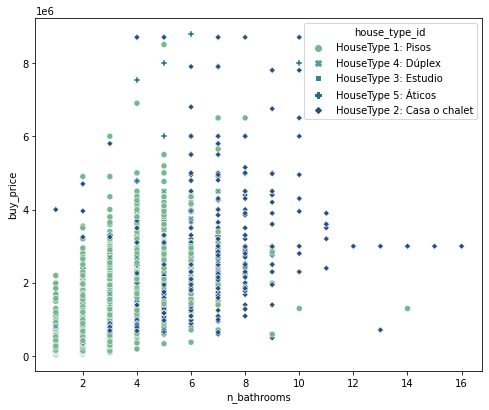

In [42]:
f, ax = plt.subplots(figsize=(8, 6.5))

sns.scatterplot(data=data, x='n_bathrooms', y='buy_price', hue='house_type_id', style='house_type_id', palette='crest', ax=ax)
plt.show()

In [43]:
data.n_bathrooms.value_counts()

1.0     9083
2.0     7408
3.0     2428
4.0     1170
5.0      871
6.0      422
7.0      183
8.0       94
9.0       37
10.0      13
11.0       7
14.0       3
13.0       3
12.0       1
15.0       1
16.0       1
Name: n_bathrooms, dtype: int64

In [44]:
data.loc[data.n_bathrooms.isnull(),['title', 'subtitle','sq_mt_built', 'n_rooms','n_floors', 'floor', 'buy_price', 'house_type_id']]

,title,subtitle,sq_mt_built,n_rooms,n_floors,floor,buy_price,house_type_id
2266,"Piso en venta en calle María Antonia, 9","Moscardó, Madrid",70.0,2,NaN,4,114000,HouseType 1: Pisos
3056,Piso en venta en JAEN,"Cuatro Caminos, Madrid",165.0,3,NaN,Bajo,276800,HouseType 1: Pisos
3702,Piso en venta en Nuestra Señora del Carmen,"Berruguete, Madrid",661.0,0,NaN,Bajo,650000,HouseType 1: Pisos
7214,"Dúplex en venta en calle de Luisa Fernanda, 3","Argüelles, Madrid",547.0,0,NaN,6,1700000,HouseType 4: Dúplex
11179,"Estudio en venta en calle de Carranza, 22","Trafalgar, Madrid",119.0,0,NaN,3,550000,HouseType 3: Estudio
14280,"Estudio en venta en paseo de la Castellana, 174","Nueva España, Madrid",174.0,0,NaN,5,750000,HouseType 3: Estudio
16402,Piso en venta en calle de Eugenia de Montijo,"Puerta Bonita, Madrid",551.0,0,NaN,Bajo,600000,HouseType 1: Pisos
16408,"Piso en venta en calle de Zaida, 46","San Isidro, Madrid",75.0,3,NaN,3,130000,HouseType 1: Pisos
16997,Piso en venta en calle de Salvador Alonso,"San Isidro, Madrid",142.0,0,NaN,Bajo,126000,HouseType 1: Pisos
17532,Piso en venta en cuesta DE LAS DESCARGAS,"Palacio, Madrid",126.0,0,NaN,1,380000,HouseType 1: Pisos


In [45]:
data[data.house_type_id.str.contains('Piso') | data.house_type_id.str.contains('Estudio') | 
     data.house_type_id.str.contains('Dúplex')].groupby(['house_type_id', 'n_bathrooms']).agg({'n_bathrooms': ['count']}).unstack()

n_bathrooms                                            \
                           count                                             
n_bathrooms                 1.0     2.0     3.0    4.0    5.0   6.0   7.0    
house_type_id                                                                
HouseType 1: Pisos        8248.0  6531.0  1794.0  677.0  341.0  86.0  14.0   
HouseType 3: Estudio       356.0    27.0     NaN    NaN    NaN   NaN   NaN   
HouseType 4: Dúplex        127.0   252.0   166.0   67.0   42.0  17.0   4.0   

                                          
                                          
n_bathrooms          8.0  9.0  10.0 14.0  
house_type_id                             
HouseType 1: Pisos    1.0  3.0  1.0  1.0  
HouseType 3: Estudio  NaN  NaN  NaN  NaN  
HouseType 4: Dúplex   NaN  NaN  NaN  NaN

In [46]:
def fill_missing(column_to_change, column_ref, **kwargs):
    '''Fill missing values in a column by grouping them to categories in another column.
       Parameters: column to change; column used as reference; dictionary with pairs category:new_value
       Returns: Nothing, the changes are done in place. Outputs progress.'''
    
    for type_house, new_number in kwargs.items():
        rel_no = (data[column_ref].str.contains(type_house)) & (data[column_to_change].isnull())
        data.loc[(rel_no), column_to_change] = new_number
        print('Done ' + type_house)
bathrooms_data = {'Dúplex': 2, 'Piso': 1, 'Estudio': 1}
fill_missing('n_bathrooms', 'house_type_id', **bathrooms_data)

Done Dúplex
Done Piso
Done Estudio


In [47]:
data = data.astype({'n_bathrooms' : 'int64'})

In [48]:
print(data.n_floors.notnull().sum())
data[(data.n_floors.notnull())]['house_type_id'].value_counts()

1436


HouseType 2: Casa o chalet    1436
Name: house_type_id, dtype: int64

In [49]:
floors_data = {'Dúplex': 2, 'Piso': 1, 'Estudio': 1, 'Ático': 1}
fill_missing('n_floors', 'house_type_id', **floors_data)

Done Dúplex
Done Piso
Done Estudio
Done Ático


In [50]:
data[(data.n_floors.isnull())]['house_type_id'].value_counts()

HouseType 2: Casa o chalet    502
Name: house_type_id, dtype: int64

In [51]:
print("Data from houses without number of floors: ")
print(data.loc[data.n_floors.isnull(),['sq_mt_built', 'n_rooms', 'n_bathrooms', 'sq_mt_allotment', 'buy_price']].describe())
print("Data from the rest of the houses: ")
print(data.loc[data.n_floors.notnull() & data.house_type_id.str.contains('Casa'),['sq_mt_built', 'n_rooms', 'n_bathrooms', 'sq_mt_allotment', 'n_floors',
                                                                                  'buy_price']].describe())
print("Number of floors: ")
floor_number = data[(data.n_floors.notnull()) & (data.house_type_id.str.contains('Casa'))]['n_floors'].value_counts()
print(floor_number)

Data from houses without number of floors: 
       sq_mt_built     n_rooms  n_bathrooms  sq_mt_allotment     buy_price
count   502.000000  502.000000   502.000000       502.000000  5.020000e+02
mean    533.004320    5.364542     4.972112       670.083665  1.884695e+06
std     381.334173    1.837885     2.163760      1007.330426  1.358770e+06
min      30.000000    1.000000     1.000000         0.000000  3.900000e+04
25%     306.500000    4.000000     3.250000         0.000000  9.125000e+05
50%     421.500000    5.000000     5.000000       291.500000  1.600000e+06
75%     700.000000    6.000000     6.000000      1000.000000  2.500000e+06
max    2400.000000   18.000000    15.000000      6000.000000  8.700000e+06
Data from the rest of the houses: 
       sq_mt_built      n_rooms  n_bathrooms  sq_mt_allotment     n_floors  \
count  1436.000000  1436.000000  1436.000000      1436.000000  1436.000000   
mean    480.242362     5.331476     4.715181       640.941504     3.130919   
std     298.

In [52]:
print("Houses without number of floors")
data[data.n_floors.isnull()].groupby('n_rooms').agg({'sq_mt_built': ['min','max', 'mean'], 'id':'count'})

Houses without number of floors


sq_mt_built                              id
                min          max         mean count
n_rooms                                            
1              42.0   400.000000   155.750000     4
2              30.0   187.000000    87.562500    16
3              65.0  1244.709712   270.249063    43
4              70.0   624.000000   330.705128    78
5              80.0  1477.832512   477.650162   155
6             149.0  1700.477327   593.050131   110
7             107.0  1399.825022   794.214102    44
8             264.0  2400.000000   874.412705    22
9             350.0  2400.000000  1130.132842    18
10            570.0  2400.000000  1630.182594     7
11            654.0   654.000000   654.000000     2
12            350.0   350.000000   350.000000     1
13            513.0   513.000000   513.000000     1
18            750.0   750.000000   750.000000     1

In [53]:
print("Houses with number of floors")
data[(data.n_floors.notnull()) & (data.house_type_id.str.contains('Casa'))].groupby(['n_floors', 'n_rooms']).agg({'sq_mt_built': ['min','max', 'mean'], 
                                                                                                                  'id':'count'})

Houses with number of floors


sq_mt_built                              id
                          min          max         mean count
n_floors n_rooms                                             
1.0      1          38.000000    64.000000    51.000000     2
         2          65.000000   419.000000   170.000000     4
         3          72.000000   163.000000   108.000000    11
         4          64.000000   625.000000   198.500000    16
         5         180.000000  1100.151745   445.315175    10
         6         256.000000   840.000000   536.666667     3
         7         750.000000   800.000000   775.000000     2
         8         800.000000  1060.022026   913.252753     8
2.0      1          32.000000    90.000000    60.666667     3
         2          83.000000   208.000000   135.285714     7
         3          67.000000   350.000000   140.756098    41
         4          75.000000  1000.000000   278.814286    70
         5         139.000000  1245.047490   444.135404    95
         6         180.000000  1500.000000   579.866484    45
         7         189.000000  1245.047490   687.613077    29
         8         400.000000  1200.000000   869.676218    16
         9         978.000000  1016.030707   998.010236     3
         10        654.000000   654.000000   654.000000     1
         11        685.000000  1000.000000   842.500000     2
         13        654.000000   654.000000   654.000000     1
         15        390.000000   390.000000   390.000000     1
3.0      2         360.000000   360.000000   360.000000     1
         3         127.000000   750.000000   297.071429    28
         4         130.000000   850.000000   326.724138   116
         5         135.000000  1449.477352   464.748569   129
         6         195.000000  2035.278155   615.982924   115
         7         229.000000  1494.462541   849.364846    50
         8         274.000000  2400.000000   828.410600    17
         9         450.000000  2081.332053  1247.031070     8
         10        789.000000  2400.000000  1264.308116     6
         11        250.000000  2400.000000  1295.970342     3
         12       1100.073584  1379.974326  1226.642134     3
4.0      2         432.000000   432.000000   432.000000     1
         3         180.000000   553.000000   305.478261    23
         4         168.000000   750.000000   343.170000   100
         5         189.000000  1226.158038   415.308174   222
         6         233.000000  1150.023116   502.795458   127
         7         200.000000  2000.000000   631.862585    55
         8         331.000000  1000.000000   719.619048    21
         9         370.000000   984.000000   715.750000     8
         10        503.000000   600.000000   535.333333     3
         11       2400.000000  2400.000000  2400.000000     1
         12        416.000000  2199.874293  1307.937146     2
         13       1619.870410  1619.870410  1619.870410     1
         16       1307.800093  1307.800093  1307.800093     1
         24        682.000000   750.000000   704.666667     3
5.0      4         252.000000   505.000000   378.000000     5
         5         280.000000   750.000000   453.714286    14
         7         409.000000   409.000000   409.000000     1
         8         558.000000   558.000000   558.000000     1
7.0      9        1285.189718  1285.189718  1285.189718     1

In [54]:
def fill_nfloors(column_to_change, column_ref, **kwargs):
    '''Fill number of floors' column grouping them by number of rooms.
       Parameters: column to change; column used as reference; dictionary with pairs number_of_rooms: number_of_floors
       Return: Nothing, changes are done on site. Output progress.'''
    
    for nrooms, new_number in kwargs.items():
        rel_no = (data[column_ref] == int(nrooms)) & (data[column_to_change].isnull())
        data.loc[(rel_no), column_to_change] = new_number
        print('Done ' + nrooms)
n_floors_data = {'1':2, '2':2, '3':3, '4':3, '5':4, '6':4, '7':4, '8':4, '9':4, '10':4, '11':4, '12':4, '13':4, '18':4}
fill_nfloors('n_floors', 'n_rooms', **n_floors_data)

Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 18


In [55]:
data = data.astype({'n_floors' : 'int64'})

In [56]:
print("Number of null entries: {}".format(data.floor.isnull().sum()))
print("---------Types of floors-----------")
print(data.floor.value_counts())

Number of null entries: 2604
---------Types of floors-----------
1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Semi-sótano interior      36
Entreplanta interior      32
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: floor, dtype: int64


In [57]:
print(data.loc[(data.floor.notnull()) & (data.floor.str.contains('Sótano$')), ['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price']].describe())
print(data.loc[(data.floor.notnull()) & (data.floor.str.contains('Sótano interior')), ['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price']].describe())
print(data.loc[(data.floor.notnull()) & (data.floor.str.contains('Sótano exterior')), ['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price']].describe())

       sq_mt_built   n_rooms  n_bathrooms      buy_price
count      5.00000  5.000000     5.000000       5.000000
mean      90.40000  2.800000     1.200000  263980.000000
std       46.62939  1.643168     0.447214  136174.344133
min       47.00000  1.000000     1.000000  175000.000000
25%       62.00000  2.000000     1.000000  175000.000000
50%       62.00000  2.000000     1.000000  195000.000000
75%      131.00000  4.000000     1.000000  280000.000000
max      150.00000  5.000000     2.000000  494900.000000
       sq_mt_built    n_rooms  n_bathrooms      buy_price
count    23.000000  23.000000    23.000000      23.000000
mean     70.304348   1.869565     1.173913  240386.956522
std      54.144113   1.217462     0.387553  114106.522419
min      30.000000   0.000000     1.000000   97000.000000
25%      41.000000   1.000000     1.000000  164500.000000
50%      54.000000   2.000000     1.000000  200000.000000
75%      69.500000   2.000000     1.000000  282500.000000
max     270.000000   5.

In [58]:
data.floor.replace({'Bajo': -1,'Entreplanta exterior': 0, 'Entreplanta interior': 0, 'Entreplanta' : 0, 'Semi-sótano exterior' : -2, 'Semi-sótano interior': -2,
                   'Semi-sótano': -2, 'Sótano interior' : -3, 'Sótano' : -3, 'Sótano exterior': -3}, inplace=True)
print("Not null values: ")
print(data.loc[(data.floor.notnull()),'house_type_id'].value_counts())
print("Null values: ")
print(data.loc[(data.floor.isnull()),'house_type_id'].value_counts())

Not null values: 
HouseType 1: Pisos      17166
HouseType 5: Áticos       939
HouseType 4: Dúplex       655
HouseType 3: Estudio      375
Name: house_type_id, dtype: int64
Null values: 
HouseType 2: Casa o chalet    1938
HouseType 1: Pisos             542
HouseType 5: Áticos             93
HouseType 4: Dúplex             21
HouseType 3: Estudio            10
Name: house_type_id, dtype: int64


In [59]:
def check_values(column_ref, house_type):
    '''Find out how many unique values each house's category has in a column.
       Parameters: column to check; type of house
       Returns: a Series with the unique values for a house's category'''
    
    return data.loc[(data[column_ref].notnull()) & (data.house_type_id.str.contains(house_type)), column_ref].value_counts()
check_values('floor', 'Estudio')

-1    135
1      64
2      55
3      45
4      28
6      14
5      13
-2      8
0       6
7       3
8       2
-3      2
Name: floor, dtype: int64

In [60]:
floor_heigth = {'Áticos': 10, 'Casa': -5, 'Estudio': -1}
check_values('floor', 'Dúplex')

-1    152
3     115
2     100
1      88
4      84
5      40
6      27
7      19
8      13
9      10
0       7
Name: floor, dtype: int64

In [61]:
floor_heigth = {'Áticos': 10, 'Casa': -5, 'Estudio': -1}
check_values('floor', 'Dúplex')

-1    152
3     115
2     100
1      88
4      84
5      40
6      27
7      19
8      13
9      10
0       7
Name: floor, dtype: int64

In [62]:
pisos_floor = check_values('floor', 'Piso')
pisos_floor_total = pisos_floor.sum()
pisos_floor

1     4224
2     3326
3     2705
4     2055
-1    1857
5     1133
6      688
7      424
0      258
8      251
9      131
-2      84
-3      30
Name: floor, dtype: int64

In [63]:
floor1 = pisos_floor.loc['1']/pisos_floor_total*100
floor2 = pisos_floor.loc['2']/pisos_floor_total*100
floor3 = pisos_floor.loc['3']/pisos_floor_total*100
floor4 = pisos_floor.loc['4']/pisos_floor_total*100
floor_total = floor1 + floor2 + floor3 + floor4

In [64]:
rng = np.random.default_rng()

def random_number(options):
    '''Chose an integer among the ones given based on their probalities
       Parameters: list of integers.
       Return: An integer'''
    
    return rng.choice(options, p=[floor1/floor_total,floor2/floor_total,floor3/floor_total,floor4/floor_total])

data.floor.mask(data.floor.isnull(), random_number([1,2,3,4]), inplace=True)

data = data.astype({'floor' : 'int64'})

In [65]:
data.drop(columns=['is_floor_under'], inplace=True)

In [66]:
data.neighborhood_id.iloc[0]

'Neighborhood 135: San Cristóbal (1308.89 €/m2) - District 21: Villaverde'

In [67]:
data['neighborhood'] = data.neighborhood_id.str.extract('(\d+):', expand=True)
data['district'] = data.neighborhood_id.str.extract('District (\d+)', expand=True)

data.drop(columns=['neighborhood_id'], inplace=True)

data = data.astype({'neighborhood' : 'int64'})
data = data.astype({'district' : 'int64'})

In [68]:
data.drop(columns=['operation', 'buy_price_by_area'], inplace=True)

In [69]:
data.house_type_id.unique()

array(['HouseType 1: Pisos', 'HouseType 4: Dúplex',
       'HouseType 3: Estudio', 'HouseType 5: Áticos',
       'HouseType 2: Casa o chalet'], dtype=object)

In [70]:
data['house_type'] = data.house_type_id.str.extract('(\d)', expand=True)

data.drop(columns=['house_type_id'], inplace=True)

data = data.astype({'house_type' : 'int64'})

In [71]:
data.drop(columns=['is_new_development', 'built_year'], inplace=True)

In [72]:
data.drop(columns=['has_central_heating', 'has_individual_heating'], inplace=True)

In [73]:
data[data.has_lift.notnull()].groupby('house_type').house_type.count()

house_type
1    17284
3      379
4      667
5     1026
Name: house_type, dtype: int64

In [74]:
rel_casa_nolift = (data.house_type == 2)
data.loc[(rel_casa_nolift), 'has_lift'] = False
data[data.has_lift.isnull()].groupby('house_type').house_type.count()

house_type
1    424
3      6
4      9
5      6
Name: house_type, dtype: int64

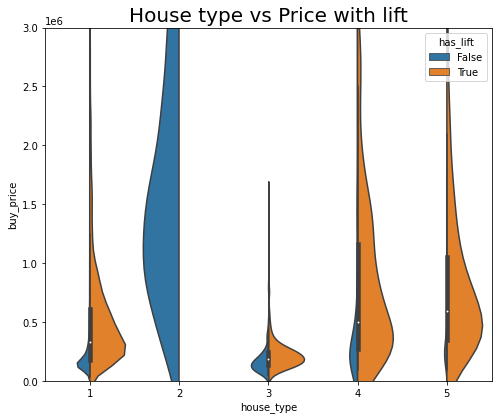

In [75]:
data.has_lift.fillna(False, inplace=True)
f, ax = plt.subplots(figsize=(8, 6.5))

sns.violinplot(x='house_type', y='buy_price', hue='has_lift', data=data, split=True, scale='count')
ax.set_ylim(0,3000000)
plt.title("House type vs Price with lift", size=20)
plt.show()

In [76]:
data[data.is_exterior.isnull()].groupby('house_type').house_type.count()

house_type
1    1051
2    1938
3      18
4      13
5      20
Name: house_type, dtype: int64

In [77]:
rel_casa_exterior = (data.house_type == 2)
data.loc[(rel_casa_exterior), 'is_exterior'] = True

In [78]:
rng = np.random.default_rng()

def random_number(options, prob):
    '''Select a value based on its given probabilities
       Parameters: a list of values; a list of their probabilities
       Returns: a value'''
    
    return rng.choice(options, p=[prob[1],prob[0]])
def ext_prob(house_type):
    '''Fill the null values in the "exterior" column according to the probabilites of each house's type
       Parameters: the house's type
       Returns: Nothing, changes are done in place'''
    
    ext0, ext1 = data[(data.is_exterior.notnull()) & (data.house_type == house_type)].groupby('is_exterior').is_exterior.count()
    ex_total = ext0 + ext1
    mask_ex = (data.is_exterior.isnull()) & (data.house_type == house_type)
    data.is_exterior.mask(mask_ex, random_number([True, False], [ext1/ex_total, ext0/ex_total]), inplace=True) 
exterior_null = [1,3,4,5]
map(ext_prob, exterior_null)

In [79]:
data = data.astype({'is_exterior' : 'bool'})

In [80]:
columns_todrop = ['has_ac', 'has_fitted_wardrobes', 'has_garden', 'has_pool','has_terrace', 'has_balcony', 'has_storage_room', 'is_accessible', 'has_green_zones',
                 'is_parking_included_in_price', 'parking_price','is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east']

data.drop(columns=columns_todrop, inplace=True)

In [81]:
data.energy_certificate.value_counts()

en trámite         10934
no indicado         3669
E                   2701
D                   1121
G                    894
F                    674
A                    618
C                    580
B                    452
inmueble exento       96
Name: energy_certificate, dtype: int64

In [82]:
data.energy_certificate.replace({'en trámite': 0,'no indicado': 0, 'inmueble exento': 0, 'G' : 1, 'F' : 2, 'E': 3, 'D': 4, 'C':5, 'B':6, 'A':7}, inplace=True)
data.drop(columns=['title', 'subtitle', 'raw_address'], inplace=True)

In [83]:
print(data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21739 entries, 0 to 21741
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21739 non-null  int64  
 1   sq_mt_built         21739 non-null  float64
 2   n_rooms             21739 non-null  int64  
 3   n_bathrooms         21739 non-null  int64  
 4   n_floors            21739 non-null  int64  
 5   sq_mt_allotment     21739 non-null  float64
 6   floor               21739 non-null  int64  
 7   buy_price           21739 non-null  int64  
 8   is_renewal_needed   21739 non-null  bool   
 9   has_lift            21739 non-null  bool   
 10  is_exterior         21739 non-null  bool   
 11  energy_certificate  21739 non-null  int64  
 12  has_parking         21739 non-null  bool   
 13  neighborhood        21739 non-null  int64  
 14  district            21739 non-null  int64  
 15  house_type          21739 non-null  int64  
dtypes: b

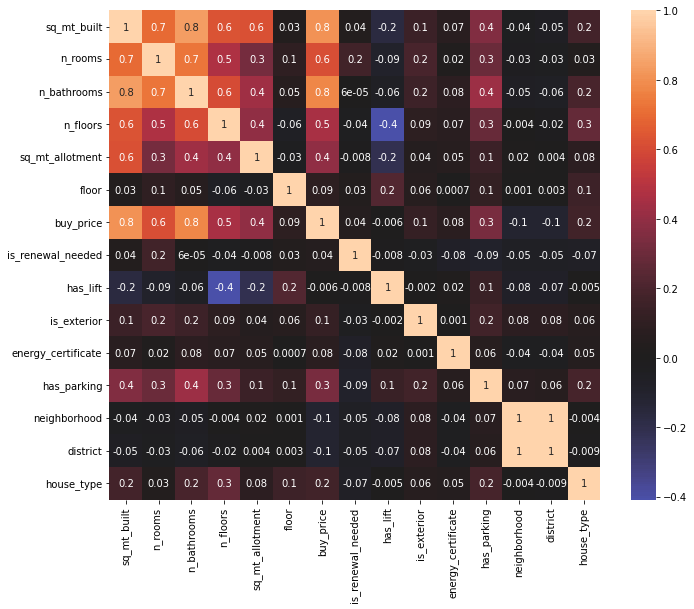

In [84]:
corr = data.iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr ,annot=True, fmt='.1g',center=0) 
plt.show()

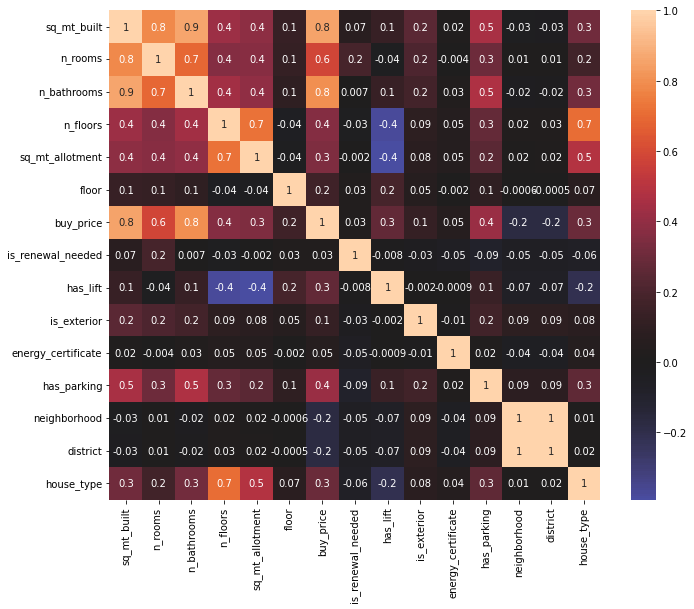

In [85]:
corr = data.iloc[:,1:].corr("spearman")
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr ,annot=True, fmt='.1g',center=0) 
plt.show()